## Gradient descent and gradient ascent

>In mathematics, __gradient descent__ (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as __gradient ascent__.

Source: __[Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)__

This method can be applied to a function $f(x)$ if it's __[Lipschitz continuous](https://en.wikipedia.org/wiki/Lipschitz_continuity)__, continuous and differentiable in $x$, and it's convex or concave. If it's convex, apply gradient descent. If it's concave, gradient ascent is applied.

In machine learning, it's commonly used on liner regression, logistic regression and neural networks.

### Linear regression example

Let's try it on a fish dataset.

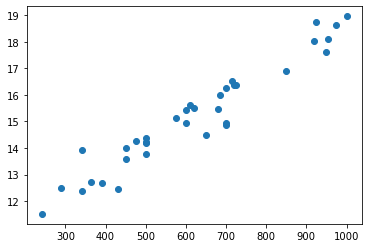

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#https://www.kaggle.com/datasets/aungpyaeap/fish-market
df = pd.read_csv("Fish.csv")
df = df[df["Species"]=='Bream']
scaler = MinMaxScaler()
plt.scatter(x=df["Weight"], y=df["Height"])

As we can see, there's a positive linear correlation between the two attributes, so we'll be using Weigth and Height for our experiment.

The loss function we'll be using is Mean Squared Error, defined as follow:

$J(\theta)=\frac{1}{2n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)^2$

Our hypothesis (linear) is defined as:

$h_\theta(x_i) = \theta_0 + \theta_1x_i$ 

Since our goal is to minimize the cost function, we'll take partial derivatives of the cost function, with regard to our weights theta (gradient descent):

$\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1) = \frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)$

$\frac{\partial}{\partial \theta_1}J(\theta_0,\theta_1) = \frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)x^{(i)}$

And this is our weight update function:

$\theta_i := \theta_i - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1)$

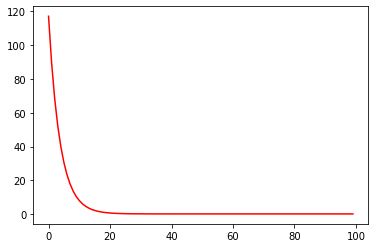

In [2]:
X = scaler.fit_transform(np.array(df["Weight"]).reshape(-1,1))
y = np.array(df["Height"]).reshape(-1,1)
# scaling the Weigth attribute so our weights don't explode

n = len(X)
X = np.c_[np.ones(n), X]

#initializing our weights with zero
theta = np.zeros((X.shape[1],1))
alpha = 0.1
epochs = 100
cost_list = []

for _ in range(epochs): 
    loss = np.dot(X, theta) - y
    theta = theta - alpha * np.dot(X.T, loss)/n
    cost = np.sum(loss ** 2) / (2*n)
    cost_list.append(cost)

# plotting the cost over the epochs
plt.plot(list(range(epochs)), cost_list, '-r')

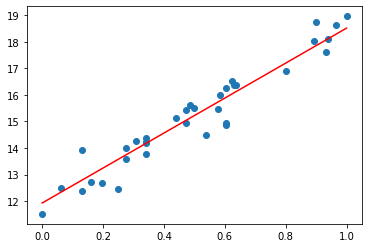

In [3]:
plt.scatter(X[:,1], y) 
plt.plot([0,1], np.dot(np.array([[1.,0.],[1.,1.]]),theta), color='red')

We can apply the gradient ascent if we flip the sign of the loss function:

$J(\theta)=-\frac{1}{2n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)^2$

The new partial derivatives of the cost function:

$\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1) = -\frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)$

$\frac{\partial}{\partial \theta_1}J(\theta_0,\theta_1) = -\frac{1}{n}\sum_{i=1}^{n}(h_\theta(x^{(i)})-y_i)x^{(i)}$

Weight update function:

$\theta_i := \theta_i + \alpha\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1)$



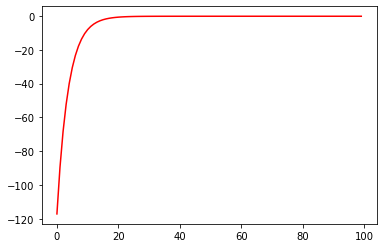

In [4]:
X = scaler.fit_transform(np.array(df["Weight"]).reshape(-1,1))
y = np.array(df["Height"]).reshape(-1,1)
# scaling the Weigth attribute so our weights don't explode

n = len(X)
X = np.c_[np.ones(n), X]

#initializing our weights with zero
theta = np.zeros((X.shape[1],1))
alpha = 0.1
epochs = 100
cost_list = []

for _ in range(epochs): 
    loss = np.dot(X, theta) - y
    theta = theta + alpha * -np.dot(X.T, loss)/n # flipped sign here
    cost = -np.sum(loss ** 2) / (2*n) # flipped sign here
    cost_list.append(cost)

# plotting the cost over the epochs
plt.plot(list(range(epochs)), cost_list, '-r')

As with the gradient descent, the cost gets closer to zero over the epochs.

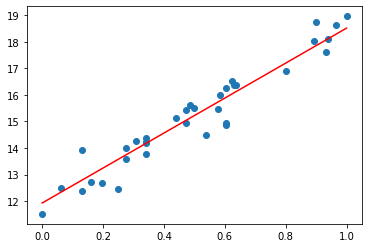

In [5]:
plt.scatter(X[:,1], y) 
plt.plot([0,1], np.dot(np.array([[1.,0.],[1.,1.]]),theta), color='red')

Our regression line after training

Since gradient descent is more used in machine learning in general than gradient ascent, we'll be using it from now on. 

There basically three forms to calculate the gradient descent:

#### Batch Gradient Descent
All of the training data is used in each epoch to update the weights. It's the method we've used in our previous examples so far.

#### Stochastic Gradient Descent
Used in neural networks, or when the dataset is too big to use it in its entirety in all epochs. In SGD only one randomly selected training example is at a time to update the gradients.




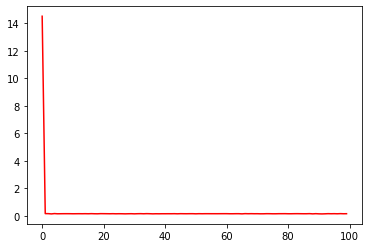

In [6]:
rng = np.random.default_rng(seed=99)

xy = np.c_[X, y]

theta = np.zeros((X.shape[1],))
alpha = 0.1
epochs = 100
cost_list = []

for _ in range(epochs):
    rng.shuffle(xy)
    cost = 0
    for i in range(n):
        x_i, y_i = xy[i, :-1], xy[i, -1:]
        
        loss = np.dot(x_i, theta) - y_i
        theta = theta - alpha * x_i * loss
        cost += (loss ** 2)

    cost_list.append(cost / (2*n))

plt.plot(list(range(epochs)), cost_list, '-r')

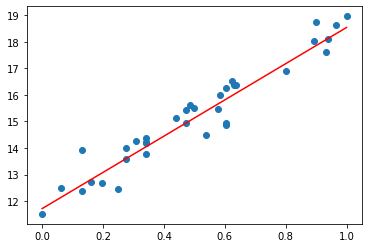

In [7]:
plt.scatter(X[:,1], y) 
plt.plot([0,1], np.dot(np.array([[1.,0.],[1.,1.]]),theta), color='red')

#### Mini-batch gradient descent

It's a compromise between batch and stochastic gradient descent. It uses part of the training set to  update the weights at each time. It runs the same as SGB if the batch_size is defined as 1.

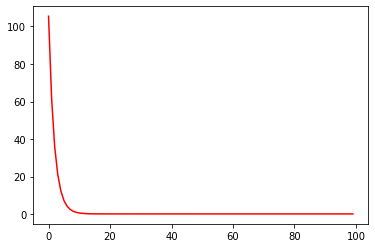

In [8]:
rng = np.random.default_rng(seed=99)

xy = np.c_[X, y]

theta = np.zeros((X.shape[1],))
theta = theta.reshape(-1,1)
alpha = 0.1
epochs = 100
cost_list = []
batch_size = 20

for _ in range(epochs):
    rng.shuffle(xy)
    cost = 0
    start = 0
    for i in range(0, n, batch_size):
        X_i, Y_i = xy[i:i+batch_size, :-1], xy[i:i+batch_size, -1:]
        Y_i = Y_i.reshape(-1,1)
        n_x = X_i.shape[0]
        loss = np.dot(X_i, theta) - Y_i
        theta = theta - alpha * np.dot(X_i.T, loss) / n_x
        cost += np.sum(loss ** 2)
                                       
    cost_list.append(cost / (2*n))

plt.plot(list(range(epochs)), cost_list, '-r')

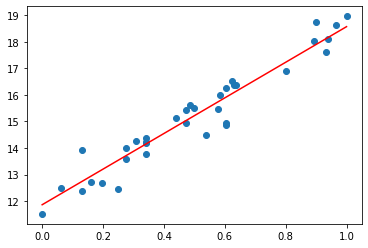

In [9]:
plt.scatter(X[:,1], y) 
plt.plot([0,1], np.dot(np.array([[1.,0.],[1.,1.]]),theta), color='red')